<a href="https://colab.research.google.com/github/Tharun882/COVID-19-Analysis/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.dates import DateFormatter
import plotly.express as px
%matplotlib inline

In [ ]:
covid=pd.read_csv("/content/novel_corona_virus_dataset.csv")

In [ ]:
covid.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0,0
5,NaN,Antarctica,-71.94990,23.347000,1/22/20,0,0,0,0
6,NaN,Antigua and Barbuda,17.06080,-61.796400,1/22/20,0,0,0,0
7,NaN,Argentina,-38.41610,-63.616700,1/22/20,0,0,0,0
8,NaN,Armenia,40.06910,45.038200,1/22/20,0,0,0,0
9,Australian Capital Territory,Australia,-35.47350,149.012400,1/22/20,0,0,0,0


In [ ]:
covid.shape

(280619, 9)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280619 entries, 0 to 280618
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   State      88361 non-null   object 
 1   Country    280619 non-null  object 
 2   Lat        278677 non-null  float64
 3   Long       278677 non-null  float64
 4   Date       280619 non-null  object 
 5   Confirmed  280619 non-null  int64  
 6   Deaths     280619 non-null  int64  
 7   Recovered  280619 non-null  int64  
 8   Active     280619 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 19.3+ MB


In [ ]:
covid.isna().sum()

State        192258
Country           0
Lat            1942
Long           1942
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [ ]:
covid.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [ ]:
covid.drop("State",inplace=True,axis=1)

In [ ]:
covid.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active'],
      dtype='object')

In [ ]:
covid.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active'],
      dtype='object')

In [ ]:
covid['Lat'].fillna(0,inplace=True)
covid['Long'].fillna(0,inplace=True)

In [ ]:
covid.isna().sum()

Country      0
Lat          0
Long         0
Date         0
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64

In [ ]:
covid.rename(columns={'Active':'Active_cases'},inplace=True)
covid.rename(columns={'Recovered':'Recovered_cases'},inplace=True)

In [ ]:
covid.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered_cases,Active_cases
0,Afghanistan,33.93911,67.709953,1/22/20,0,0,0,0
1,Albania,41.15330,20.168300,1/22/20,0,0,0,0
2,Algeria,28.03390,1.659600,1/22/20,0,0,0,0
3,Andorra,42.50630,1.521800,1/22/20,0,0,0,0
4,Angola,-11.20270,17.873900,1/22/20,0,0,0,0


In [ ]:
covid['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [ ]:
covid_latest=covid[covid['Date']=="4/2/20"]
covid_latest.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered_cases,Active_cases
20519,Afghanistan,33.93911,67.709953,4/2/20,235,4,10,221
20520,Albania,41.15330,20.168300,4/2/20,277,16,76,185
20521,Algeria,28.03390,1.659600,4/2/20,986,86,61,839
20522,Andorra,42.50630,1.521800,4/2/20,428,15,10,403
20523,Angola,-11.20270,17.873900,4/2/20,8,2,1,5


In [ ]:
covid_latest['Confirmed'].sum()

1038167

In [ ]:
covid['Active_cases']=covid['Confirmed']-(covid['Recovered_cases']+covid['Deaths'])
covid_latest=covid_latest.sort_values(by=['Confirmed'],ascending=False)
covid_latest.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered_cases,Active_cases
20779,US,40.000000,-100.000000,4/2/20,260174,8545,9001,242628
20673,Italy,41.871940,12.567380,4/2/20,115242,13915,18278,83049
20760,Spain,40.463667,-3.749220,4/2/20,112065,10348,26743,74974
20654,Germany,51.165691,10.451526,4/2/20,73522,872,22440,50210
20591,China,30.975600,112.270700,4/2/20,67802,3199,63471,1132


Now we will check the data for the 10 most affected country with covid-19.

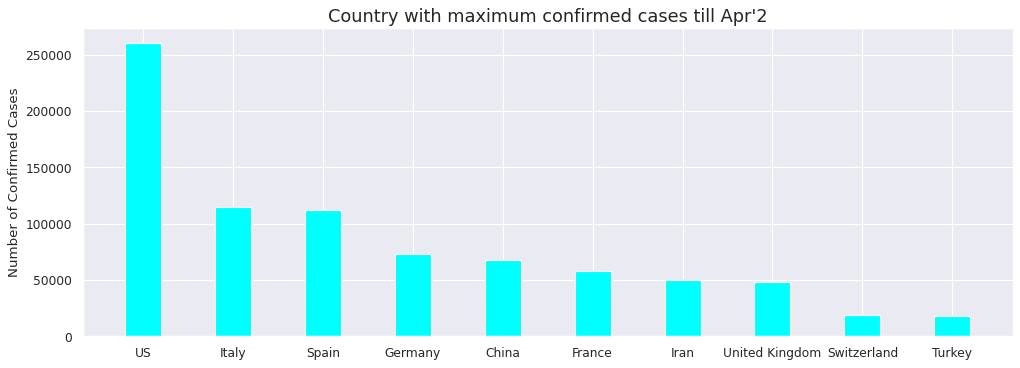

In [ ]:
covid_latest=covid_latest.sort_values(by=['Confirmed'],ascending=False)
plt.figure(figsize=(15,5),dpi=80)
plt.bar(covid_latest["Country"][0:10],covid_latest["Confirmed"][0:10],align='center',color='cyan',width=0.4)
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title("Country with maximum confirmed cases till Apr'2",size = 16)
plt.show()

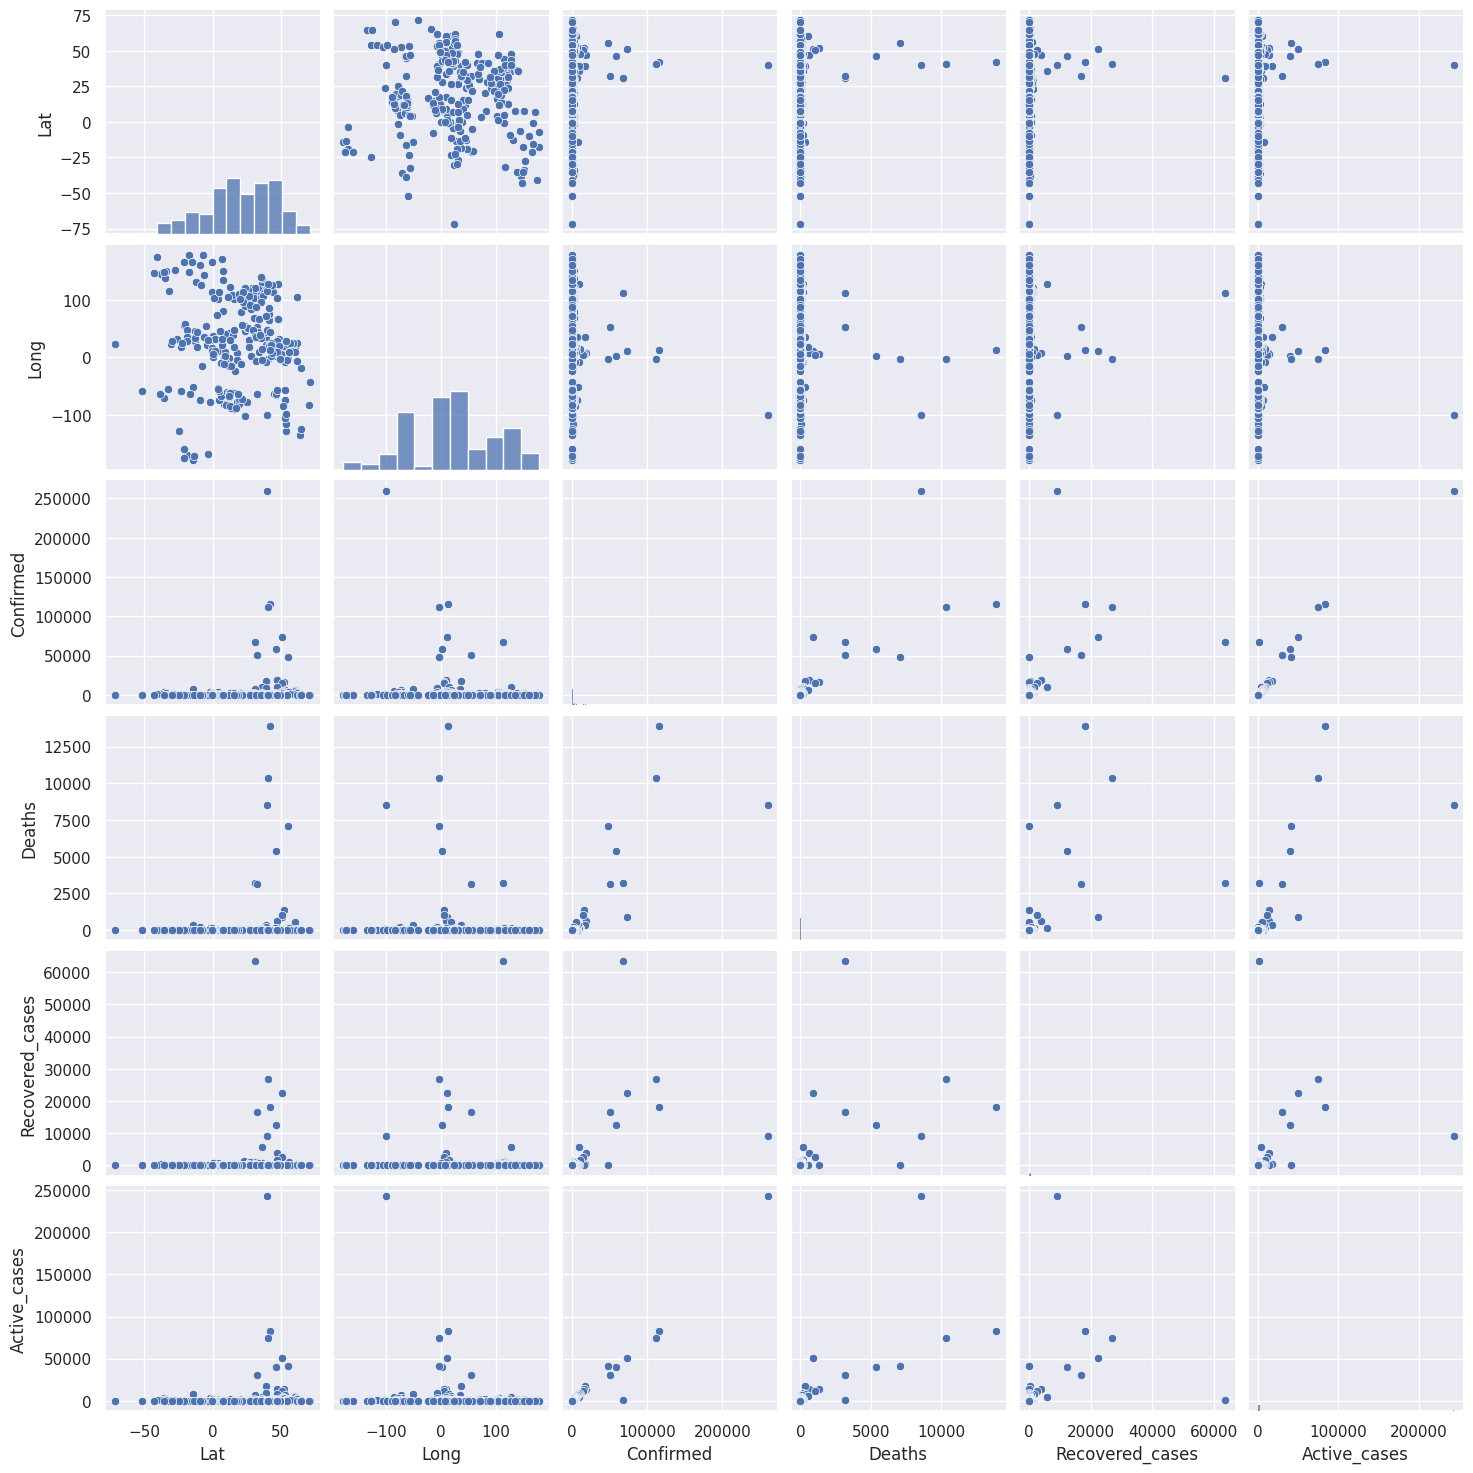

In [ ]:
sns.pairplot(covid_latest)

<ipython-input-162-1d32400ccb47>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



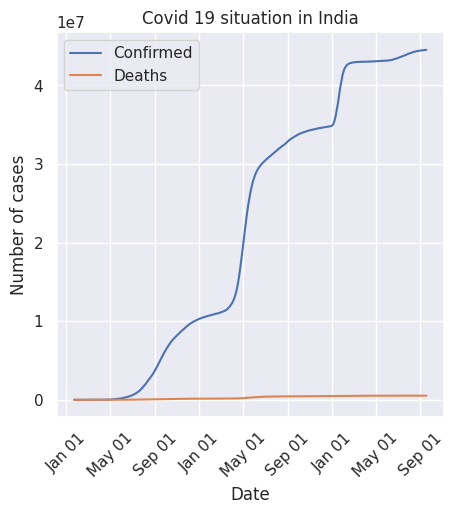

In [ ]:
covid_india = covid[covid["Country"] == "India"]
covid_india["Date"] = pd.to_datetime(covid_india["Date"])
fig, ax = plt.subplots()
ax.plot(covid_india["Date"], covid_india["Confirmed"], label="Confirmed")
ax.plot(covid_india["Date"], covid_india["Deaths"], label="Deaths")
ax.set_title("Covid 19 situation in India")
ax.set_xlabel("Date")
ax.set_ylabel("Number of cases")
date_format = mdates.DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [ ]:
fig = px.scatter(covid_india, x="Recovered_cases", y="Deaths", size="Confirmed", color="Deaths", hover_name="Country", size_max=100)
fig.show()

Top 10 Country with Maximum Cases

In [ ]:
a=covid_latest.copy()
a_top=a.head(12)
a_top.style.background_gradient(cmap='Greens')

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered_cases,Active_cases
20779,US,40.000000,-100.000000,4/2/20,260174,8545,9001,242628
20673,Italy,41.871940,12.567380,4/2/20,115242,13915,18278,83049
20760,Spain,40.463667,-3.749220,4/2/20,112065,10348,26743,74974
20654,Germany,51.165691,10.451526,4/2/20,73522,872,22440,50210
20591,China,30.975600,112.270700,4/2/20,67802,3199,63471,1132
20650,France,46.227600,2.213700,4/2/20,58404,5376,12428,40600
20669,Iran,32.427908,53.688046,4/2/20,50468,3160,16711,30597
20797,United Kingdom,55.378100,-3.436000,4/2/20,48263,7072,135,41056
20766,Switzerland,46.818200,8.227500,4/2/20,18827,605,4013,14209
20777,Turkey,38.963700,35.243300,4/2/20,18135,356,415,17364


In [ ]:
covid_latest['Deaths'].sum()

60087

<Axes: xlabel='Deaths', ylabel='Confirmed'>

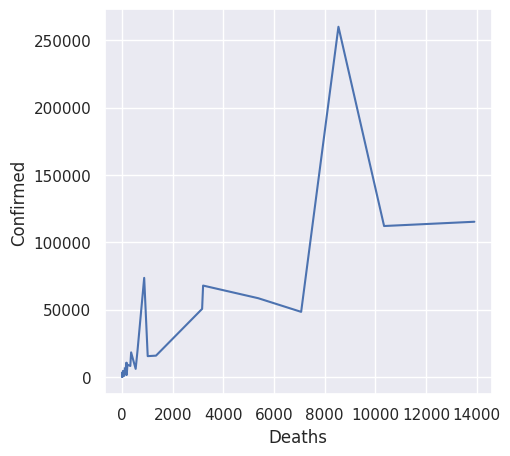

In [ ]:
covid_latest=covid_latest.sort_values(by=['Confirmed'],ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.lineplot(x='Deaths',y='Confirmed',data=covid_latest)

In [ ]:
fig = px.scatter(covid_latest, x="Recovered_cases", y="Deaths", size="Confirmed", color="Country", hover_name="Country", size_max=80)
fig.show()